In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as ks
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
import seaborn as sns
from keras.utils import to_categorical

<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[0 1 2 3 4 5 6 7 8 9]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


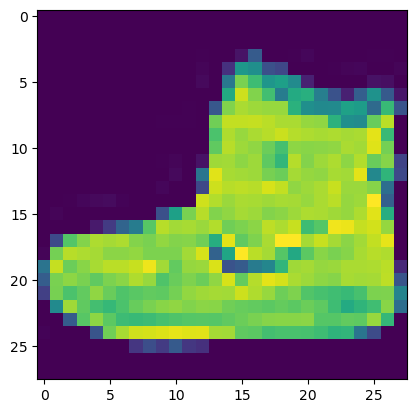

In [2]:
#Download dataset
(x_train, y_train), (x_test, y_test) = ks.datasets.fashion_mnist.load_data()

print(type(x_train))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


#convert targets to one hot encodings 
print(np.unique(y_train))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train)
print(y_test)

plt.imshow(x_train[0])

In [3]:
#declare number of channels and convert to numeric
x_train = x_train.reshape(60000, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype("float32") / 255

In [4]:
#Define Model Architecture 
model = ks.Sequential()

model.add(Convolution2D(35, (3, 3), activation="relu", input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(.25))

model.add(Convolution2D(35, (3, 3), activation="relu", input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(.25))

model.add(Dense(30, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#fit model
model.fit(x_train, y_train, batch_size=30, epochs=10, verbose=1)

C:\Users\egrah\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.7061 - loss: 0.8039
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8514 - loss: 0.4077
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.8707 - loss: 0.3552
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8817 - loss: 0.3255
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8875 - loss: 0.3058
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8905 - loss: 0.2953
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.8956 - loss: 0.2806
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9001 - loss: 0.2696
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9004 - loss: 0.2686
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9044 - loss: 0.2607


In [5]:
#test model
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Loss {score[0]}")
print(f"Accuracy {score[1]}")

Loss 0.262010395526886
Accuracy 0.9036999940872192


In [16]:
#explainable AI with SHAP
import shap

samples = x_train[np.random.choice(x_train.shape[0], 5000, replace=False)]

#masker = shap.maskers.Image("inpaint_telea", x_train[0].shape)

#e = shap.Explainer(model, masker, output_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"])
e = shap.DeepExplainer(model, samples)


#shap_values_1 = e.shap_values(x_test[1:10])

C:\Users\egrah\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [18]:
#test one sample from each class

x_test_each_class = dict()

for i, j in enumerate(y_test):
    if len(x_test_each_class) == 10:
        break
    if int(np.where(j == j.max())[0]) not in x_test_each_class.keys():
        x_test_each_class[int(np.where(j == j.max())[0])] = x_test[i]
        
x_test_each_class = [x_test_each_class[i] for i in sorted(x_test_each_class)]
x_test_each_class = np.asarray(x_test_each_class)

shap_values = e(x_test_each_class)
#shap_values = e.shape_values(x_test_each_class)

(10, 28, 28, 1, 10)


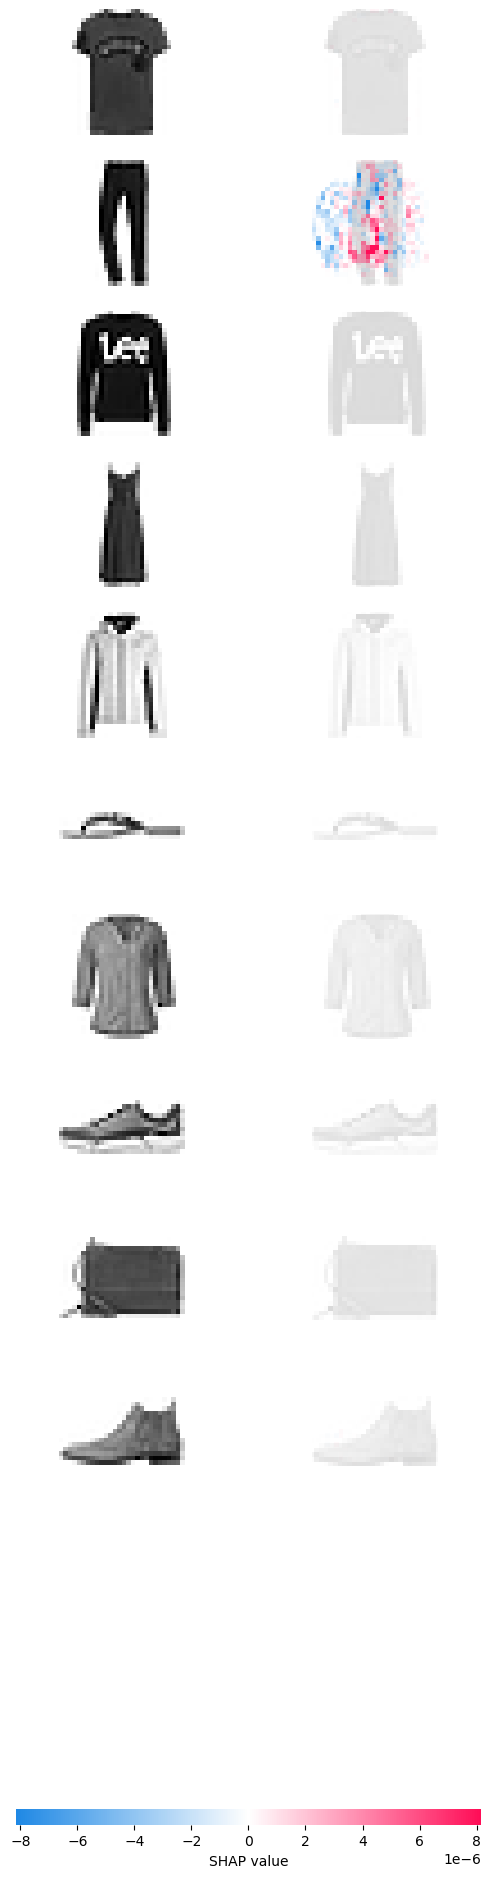

In [19]:
print(shap_values.shape)

shap.image_plot(shap_values, -x_test_each_class)
#shap.image_plot(shap_values_1, x_test[1:10])

In [ ]:
#observe incorrectly classifieid samples
preds = model.predict(x_test)

predicted_class = np.argmax(preds, axis=1)
actual_class = np.argmax(y_test, axis=1)

#indexes of incorrect classifications
incorrect_indices = np.where(predicted_class != actual_class)

print(predicted_class[incorrect_indices])
print(actual_class[incorrect_indices])


shap_values_incorrect = e.shap_values(x_test[incorrect_indices])
shap.image_plot(shap_values_incorrect, x_test[incorrect_indices])